In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import random

In [47]:
dt = 0.01 #delta t
c = 1 #constant
s = 150 #time moment
a = 90 #left limit
b = 110 #right limit
x0 = 50 #initial value of the process
l=200
n=np.floor(l/dt)
t=[]

In [48]:
dt
n*dt
for i in np.arange(0,n*dt,dt):
    t.append(i)
random.seed(1000)

In [49]:
z = np.repeat(0, int(n)*1).reshape((int(n),1))
len(z)
temp = np.random.uniform(0,1,20000)
z=temp.reshape((int(n),1))
z = 2*(z>0.5)-1
z = z*c*np.sqrt(dt); 

In [50]:
w = np.repeat(0, int(n)*1).reshape((int(n),1))
w = x0 + np.cumsum(z);
x0 = [x0] + list(w)

In [51]:
# Computing the normal distribution;
max1   =  max(w);
min1   =  min(w);
sigma  =  np.sqrt(max(t)-s)*c;
mu = w[int(s/dt)]
mu

48.699999999999996

In [52]:
ndata=[]
min1-sigma**2
sigma**2*(max1-min1)
for i in np.arange(min1-sigma**2,sigma**2*(max1-min1),0.2):
    ndata.append(i)
len(ndata)


4003

In [53]:
pi = np.pi
f = 750*1/np.sqrt(2*pi*sigma*sigma)*np.exp(-(ndata-mu)**2/(2*sigma**2) )+max(t);
f

array([199.99, 199.99, 199.99, ..., 199.99, 199.99, 199.99])

In [54]:
fndata  = pd.DataFrame(ndata,100*f).reset_index().rename(columns = {'index':'f',0:"x"})
maxf   = max(fndata["f"])
maxt   = max(t)*100;
minmax  = pd.DataFrame([min1,max1,mu,sigma,maxf,maxt],index = ["min1","max1","mu","sigma","maxf","maxt"],).T
minmax

,min1,max1,mu,sigma,maxf,maxt
0,39.4,55.2,48.7,7.070361,24230.502248,19999.0


In [55]:
w = pd.DataFrame(w,t).reset_index().rename(columns = {'index':'t',0:"w"})


In [56]:
minmax ['low'] = minmax['min1'] - minmax['sigma'] 
minmax ['upp'] = minmax['max1'] + minmax['sigma'] 
minmax ['maxy'] = minmax['maxf'] + 1000
minmax ['refS'] = 100 *s
minmax ['low1'] = minmax['mu'] - minmax['sigma'] 
minmax ['upp1'] = minmax['mu'] + minmax['sigma'] 


In [57]:
w
date = pd.concat([w,fndata],axis = 1)



In [58]:
Nlist = list(range(1, len(date)+1))
date["iterations"] = Nlist
date.loc[(date['iterations']>=15000) & (date['iterations']<=19999),'rline'] = mu
date.rline.unique()

array([ nan, 48.7])

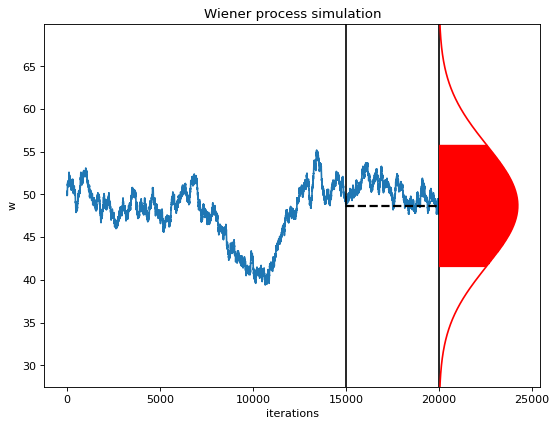

In [59]:
#Plot the conditional distribution of a Wiener process
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title('Wiener process simulation')
plt.plot(date['iterations'], date['w'])
plt.xlabel('iterations')
plt.ylabel('w')
plt.axvline(x=15000, color='k', label='line')
plt.axvline(x=20000, color='k', label='line')
plt.hlines(y=mu, xmin=15000, xmax=20000, colors='k', linestyles='--', lw=2, label='line')
plt.plot(fndata['f'], fndata['x'],color='red')
plt.ylim((mu- 3*sigma, mu + 3*sigma))


# Drawing the red area
a = mu - sigma
b = mu + sigma
i = a+0.1
plt.hlines(y=a,xmin=20000, xmax=100*(750*1/np.sqrt(2*pi*sigma*sigma)*np.exp(-(a-mu)**2/(2*sigma**2) )
           +max(t)),colors='r', lw=2, label='line')
while i < b:

    plt.hlines(y=i,xmin=20000, xmax=100*(750*1/np.sqrt(2*pi*sigma*sigma)*np.exp(-(i-mu)**2/(2*sigma**2) )
           +max(t)),colors='r', lw=2, label='line')
    i += 0.1


